In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import seaborn as sns
import sklearn

In [3]:
df = pd.read_csv("C:/Users/ALGORITHM/Documents/DATA SET/spam.csv", encoding = "latin1")

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
ps = PorterStemmer()

In [7]:
del df["Unnamed: 2"]
del df['Unnamed: 3']
del df['Unnamed: 4']

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df = df.rename(columns = {'v1':'Labels', "v2":'emails'})

In [10]:
df

,Labels,emails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: xlabel='Labels', ylabel='count'>

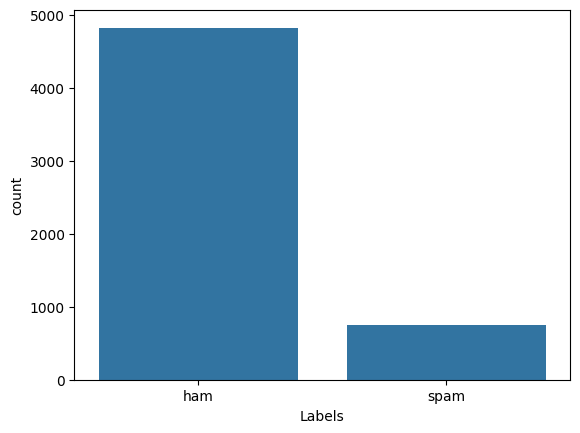

In [11]:
sns.countplot(x = "Labels", data = df)

In [12]:
df.Labels.unique()

array(['ham', 'spam'], dtype=object)

In [13]:
y = df.Labels.map({'ham':0, "spam":1})

In [14]:
del df["Labels"]

In [15]:
df.emails[5]

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

            list comprehension

In [16]:
data = []

In [17]:
for i in range(len(df.emails)):
    msg = re.sub("[^a-zA-Z]", " ", df.emails[i])
    msg = msg.lower()
    msg = msg.split()
    msg = [ps.stem(word) for word in msg if word not in set(stopwords.words("english"))]
    msg = " ".join(msg)
    data.append(msg)
    

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
cv = CountVectorizer(max_features = 4000)

In [20]:
vec_train = cv.fit_transform(data).toarray()

In [21]:
vec_train[9]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(vec_train, y, test_size = 0.2, random_state = 2)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model = RandomForestClassifier(max_depth = 400)

In [26]:
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=400)

In [27]:
pred = model.predict(x_test)

In [28]:
(pred == y_test).mean()

0.9641255605381166

In [29]:
import pickle

In [30]:
with open("spam_classifier_model.pkl", "wb") as file:
    pickle.dump((cv, model), file)